# Импорт библиотек

In [49]:
import pandas as pd
import numpy as np

from tkinter import filedialog as fd
from tkinter import Tk, BOTH

from datetime import datetime
from datetime import timedelta

from scipy import stats
from sympy import *
from math import *

import seaborn as sns
import matplotlib.pyplot as plt


pd.options.display.float_format = '{:,.4f}'.format

import warnings
warnings.filterwarnings("ignore")

from typing import Tuple

%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all" #print all out

## Задача. Посмотреть ЦПТ на разных распределениях

#### Экспоненциальное (показательное)

<Axes: ylabel='Count'>

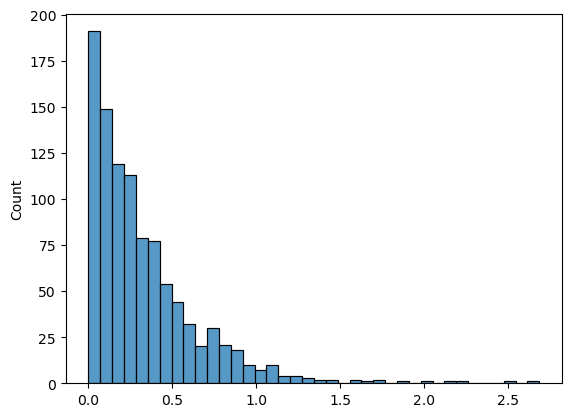

In [2]:
from  scipy.stats import expon

n=1000

sns.histplot(expon.rvs(scale = 1/3, size = n))

<Axes: ylabel='Count'>

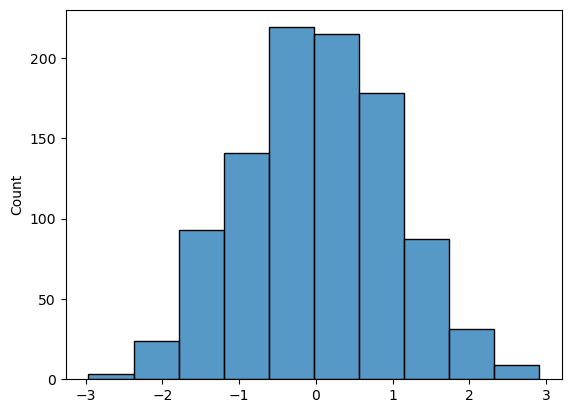

In [3]:
Y = []

for i in range(1000):
    sample = expon.rvs(scale = 1/2, size = n)
    Y.append((sum(sample) - n*expon.mean(scale = 1/2))/(np.sqrt(n)*expon.std(scale = 1/2)))
    
sns.histplot(Y, bins = 10)

#### Биномиальное

<Axes: ylabel='Count'>

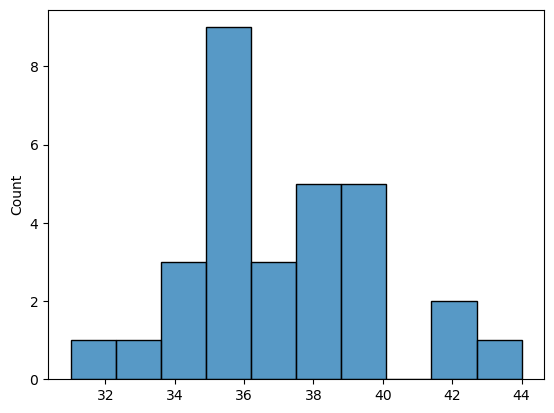

In [4]:
from  scipy.stats import binom

n, p = 52, 0.7

sns.histplot(binom.rvs(n, p, size=30), bins=10)

<Axes: ylabel='Count'>

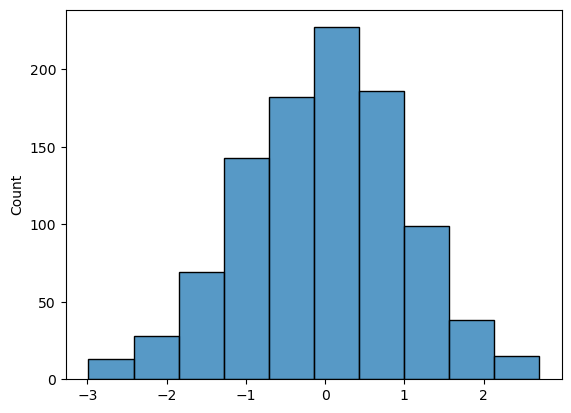

In [5]:
Y = []

n, p = 50, 0.7

for i in range(1000):
    sample = binom.rvs(n, p, size=30)
    Y.append((sum(sample) - 30*binom.mean(n, p))/(np.sqrt(30)*binom.std(n, p)))
    
sns.histplot(Y, bins = 10)

#### Гамма-рапределение

<Axes: ylabel='Count'>

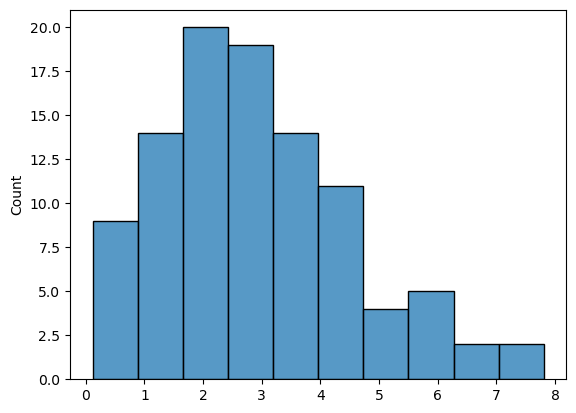

In [6]:
from  scipy.stats import gamma

a = 3

sns.histplot(gamma.rvs(a, size=100), bins=10)

<Axes: ylabel='Count'>

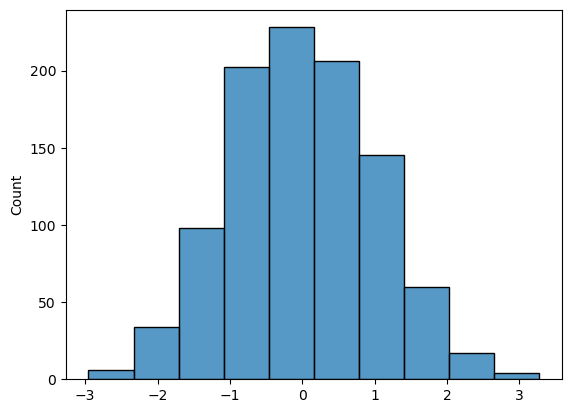

In [7]:
Y = []

a = 3

for i in range(1000):
    sample = gamma.rvs(a, size=100)
    Y.append((sum(sample) - 100*gamma.mean(a))/(np.sqrt(100)*gamma.std(a)))
    
sns.histplot(Y, bins = 10)

#### Хи квадрат

<Axes: ylabel='Count'>

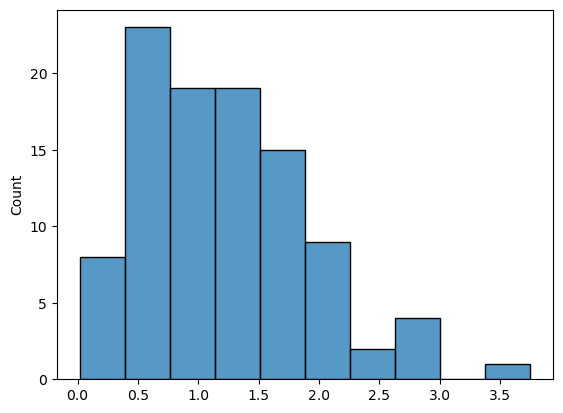

In [8]:
from  scipy.stats import chi

a = 2

sns.histplot(chi.rvs(a, size=100), bins=10)

<Axes: ylabel='Count'>

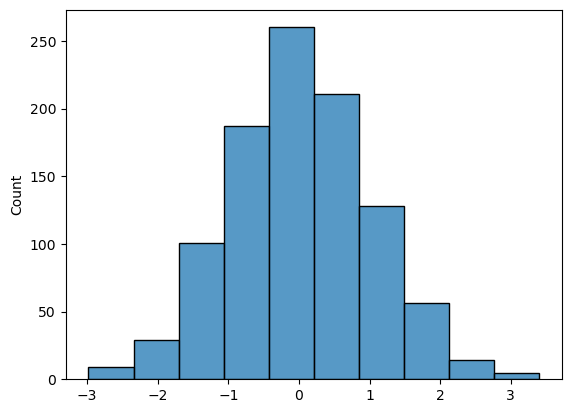

In [9]:
Y = []

a = 2

for i in range(1000):
    sample = chi.rvs(a, size=100)
    Y.append((sum(sample) - 100*chi.mean(a))/(np.sqrt(100)*chi.std(a)))
    
sns.histplot(Y, bins = 10)

#### Стьюдента 

<Axes: ylabel='Count'>

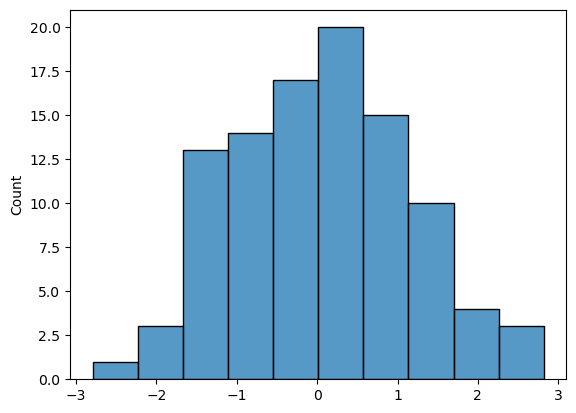

In [10]:
from  scipy.stats import t

a = 20

sns.histplot(t.rvs(a, size=100), bins=10)

<Axes: ylabel='Count'>

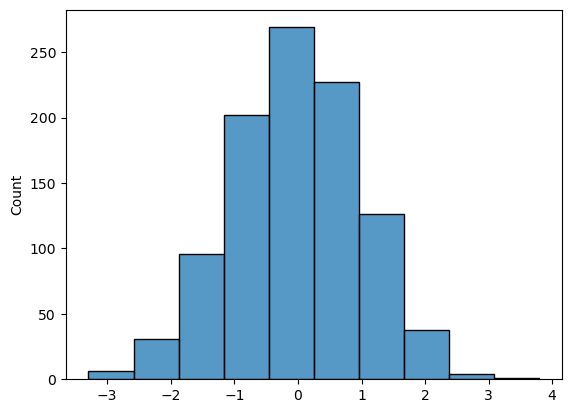

In [11]:
Y = []

a = 20

for i in range(1000):
    sample = t.rvs(a, size=100)
    Y.append((sum(sample) - 100*t.mean(a))/(np.sqrt(100)*t.std(a)))
    
sns.histplot(Y, bins = 10)

#### Бета

<Axes: ylabel='Count'>

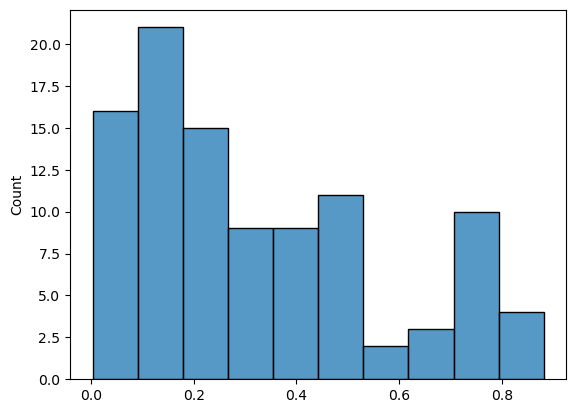

In [12]:
from  scipy.stats import beta

a = 1
b = 2

sns.histplot(beta.rvs(a, b, size=100), bins=10)

<Axes: ylabel='Count'>

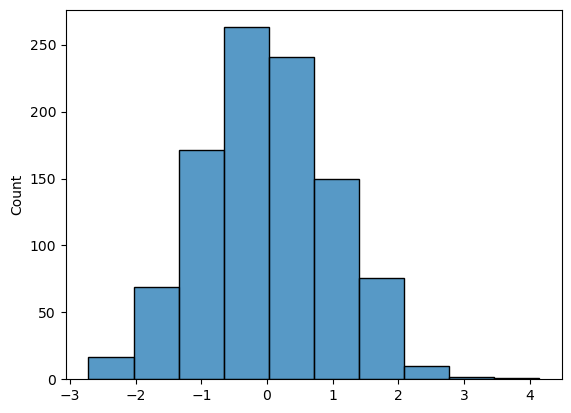

In [13]:
Y = []

a = 1
b = 2

for i in range(1000):
    sample = beta.rvs(a, b, size=100)
    Y.append((sum(sample) - 100*beta.mean(a, b))/(np.sqrt(100)*beta.std(a, b)))
    
sns.histplot(Y, bins = 10)

# Задача 1

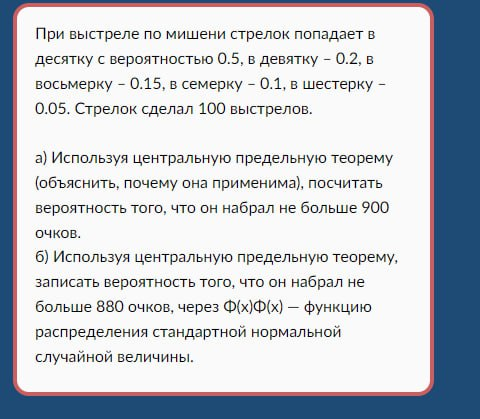

In [106]:
df = pd.DataFrame({'val':[6, 7, 8, 9, 10], 'prob':[0.05, 0.1, 0.15, 0.2, 0.5]})

xk = df['val']
pk = df['prob']
custm_dist = stats.rv_discrete(name='cust_dist', values=(xk, pk))

In [107]:
mean = custm_dist.mean()
mean

9.0

In [108]:
var = custm_dist.var()
var

1.5

In [109]:
std = custm_dist.std()

std

1.224744871391589

$Y = X_1 + \dots + X_{100} $

$Y \sim  N(n\mu, n\sigma^2)$

$Y \sim  N(100 \cdot 9, 100 \cdot 1.5)$

## a

In [110]:
stats.norm.cdf(x=900, loc=900, scale=np.sqrt(100*var))

0.5

## b

$ P(0 < Y < 880) = Ф_0(\frac{\beta - a}{\sigma}) - Ф_0(\frac{\alpha - a}{\sigma}) $

$ P(0 < Y < 880) = Ф_0(\frac{880 - 900}{12.24}) - Ф_0(\frac{0 - 900}{12.24}) $

$ P(0 < Y < 880) = Ф_0(-1.63) + Ф_0(71.89) $

$ P(0 < Y < 880) = -0.44845 + 0.5 \approx 0.051$

In [111]:
stats.norm.cdf(x=880, loc=900, scale=np.sqrt(100*var))

0.051235217429874684

# Задача 2

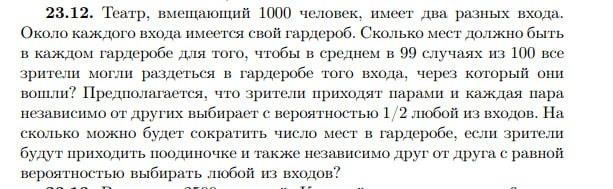

a)

$ N = 500, p=1/2, q=1/2, Bern(1/2, 1/4)$
$K - вместимость$

$Y = X_1 + \dots + X_{1000} $

$Y \sim N(500 \cdot \frac{1}{2}, 500 \cdot \frac{1}{4}) $ 

$Y \sim N(250, 125) $

$P(Y \leq K) = 0.99$

$K_1 = 554 $

b)

$ N = 1000, p=1/2, q=1/2, Bern(1/2, 1/4)$
$K - вместимость$

$Y = X_1 + \dots + X_{1000} $

$Y \sim N(1000 \cdot \frac{1}{2}, 1000 \cdot \frac{1}{4}) $ 

$Y \sim N(500, 250) $

$P(Y \leq K) = 0.99$

$K_2 = 537 $

diff = $ K_1 - K_2 = 554 - 537 = 17$ 

In [51]:
# a
K_1 = ceil(stats.norm.ppf(0.99, loc=250, scale=np.sqrt(125)))

K_1 * 2

554

In [53]:
# b
K_2 = ceil(stats.norm.ppf(0.99, loc=500, scale=np.sqrt(250)))
K_2

537

# Задача 3
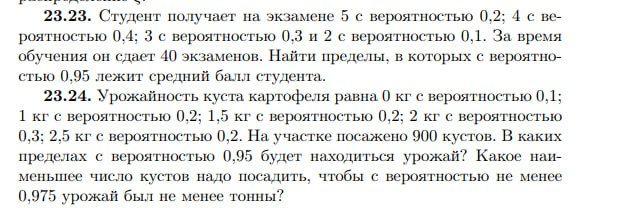

## 23.23

In [96]:
df = pd.DataFrame({'val':[5, 4, 3, 2], 'prob':[0.2, 0.4, 0.3, 0.1]})

xk = df['val']
pk = df['prob']
custm_dist = stats.rv_discrete(name='cust_dist', values=(xk, pk))

In [97]:
mean = custm_dist.mean()
mean

3.7

In [98]:
var = custm_dist.var()
var

0.8099999999999987

In [99]:
std = custm_dist.std()
std

0.8999999999999992

$n = 40$

$\overline{x} \sim  N(\mu, \frac{\sigma^2}{n})$

$\overline{x} \sim  N(3.7, 0.0225)$

In [100]:
confidence_interval = stats.norm.interval(0.95, loc=mean, scale=np.sqrt(var/40))
confidence_interval

(3.4210922354629476, 3.9789077645370527)

## 23.24

In [101]:
df = pd.DataFrame({'val':[0, 1, 1.5, 2, 2.5], 'prob':[0.1, 0.2, 0.2, 0.3, 0.2]})

xk = df['val']
pk = df['prob']
custm_dist = stats.rv_discrete(name='cust_dist', values=(xk, pk))

In [102]:
mean = custm_dist.mean()
mean

1.6

In [103]:
var = custm_dist.var()
var

0.5399999999999996

In [104]:
std = custm_dist.std()
std

0.7348469228349531

a) 

$n = 900$

$Y = X_1 + \dots + X_{900} $

$Y \sim  N(n\mu, n\sigma^2)$

$Y \sim  N(900 \cdot 1.6, 900 \cdot 0.54)$

In [105]:
confidence_interval = stats.norm.interval(alpha=0.95, loc=900*mean, scale=np.sqrt(900*var))
confidence_interval

(1396.7917949128023, 1483.2082050871977)

In [124]:
# Заданные вероятности и соответствующие значения урожайности
probabilities = np.array([0.1, 0.2, 0.2, 0.3, 0.2])
harvest_values = np.array([0, 1, 1.5, 2, 2.5])

# Смоделируем урожайность для 900 кустов картофеля
num_simulations = 10000
total_harvest = np.random.choice(harvest_values, size=(num_simulations, 900), p=probabilities)
total_harvest_sum = np.sum(total_harvest, axis=1)

# Найдем 95% доверительный интервал для урожайности
confidence_interval = np.percentile(total_harvest_sum, [2.5, 97.5])
print("95% доверительный интервал для урожайности (в кг):", confidence_interval)

# # Определим минимальное число кустов, чтобы урожай был не менее 1 тонны с вероятностью не менее 0.975
# min_num_plants = np.ceil(np.percentile(total_harvest_sum, 97.5) / 1000)
# print("Минимальное число кустов, чтобы урожай был не менее 1 тонны с вероятностью не менее 0.975:", min_num_plants)

95% доверительный интервал для урожайности (в кг): [1397.  1482.5]
